In [5]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import comptools as comp
from submit_feature_scan import scan_features

color_dict = comp.color_dict

%matplotlib inline

In [6]:
config = 'IC86.2012'
num_groups = 2
pipeline = 'xgboost'
energybins = comp.get_energybins()
comp_list = comp.get_comp_list(num_groups=num_groups)

In [3]:
pipeline_str = '{}_comp_{}_{}-groups'.format(pipeline, config, num_groups)
pipeline_str

'xgboost_comp_IC86.2012_2-groups'

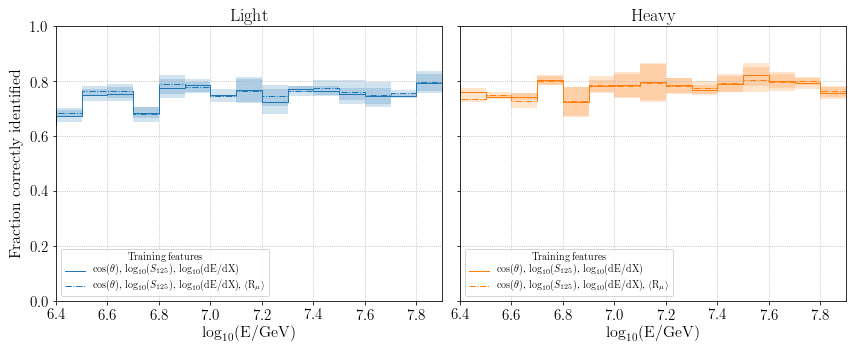

In [39]:
cwd = os.getcwd()
linestyles = ['-', '-.']
fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
for features, ls in zip(scan_features, linestyles):
    features_str = '-'.join(features)
    results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
    results_file = os.path.join(cwd,
                                'feature_scan_results',
                                results_basename)
    results = joblib.load(results_file)
    
    for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
        # Add to plot
        comp.plot_steps(energybins.log_energy_bins,
                        results['acc_mean_{}'.format(composition)],
                        yerr=results['acc_std_{}'.format(composition)],
                        color=color_dict[composition],
                        ls=ls,
                        label=', '.join(results['feature_labels']),
                        ax=ax)

        ax.set_xlim(6.4, 7.9)
        ax.set_ylim(0, 1)
        ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
        if idx == 0:
            ax.set_ylabel('Fraction correctly identified')
        ax.set_title(composition.title())
        ax.grid(lw=0.8)
        ax.legend(title='Training features', loc='lower left', fontsize=10)
plt.show()

In [4]:
cwd = os.getcwd()
results_file = os.path.join(cwd,
                            'feature_scan_results',
                            'xgboost_comp_IC86.2012_2-groups-lap_cos_zenith-log_s125-log_dEdX.pkl')
results = joblib.load(results_file)

In [5]:
results

{'acc_mean': array([0.67592717, 0.70404525, 0.71567191, 0.71923716, 0.74559821,
        0.74882806, 0.74671811, 0.75102311, 0.78425168, 0.76885471,
        0.78150445, 0.75578166, 0.7713787 , 0.77607552, 0.78841407,
        0.77229491, 0.77016166, 0.77596939, 0.79522635]),
 'acc_std': array([0.01158286, 0.01368767, 0.01486903, 0.0108554 , 0.00805719,
        0.01749853, 0.00976711, 0.01142205, 0.01088052, 0.02954736,
        0.01109182, 0.01546985, 0.01300799, 0.01131126, 0.01196021,
        0.01184983, 0.00752094, 0.0257484 , 0.02076233]),
 'best_params': {'classifier__learning_rate': 0.2,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 200},
 'config': 'IC86.2012',
 'feature_labels': ('$\\cos(\\theta)$',
  '$\\log_{10}(S_{\\mathrm{125}})$',
  '$\\mathrm{\\log_{10}(dE/dX)}$'),
 'features': ('lap_cos_zenith', 'log_s125', 'log_dEdX'),
 'log_energy_bins': array([6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
        7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 'num

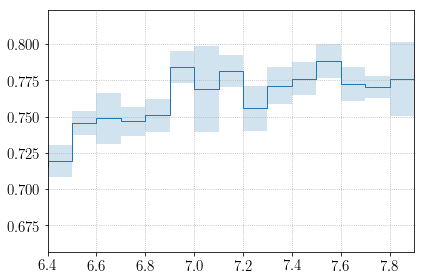

In [12]:
fig, ax = plt.subplots()
comp.plot_steps(energybins.log_energy_bins,
                results['acc_mean'],
                yerr=results['acc_std'])
ax.set_xlim(6.4, 7.9)
ax.grid(lw=0.8)
plt.show()

In [15]:
pipeline = results['pipeline']